In [1]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#損失関数を入れる
train_loss_list = []

#trainでの正解率を入れる
train_acc_list = []

#testでの正解率を入れる
test_acc_list = []

#エポック数
iter_per_epoch = max(train_size / batch_size, 1)

NameError: name 'train_size' is not defined

In [5]:
x_train[0].shape

(784,)

In [ ]:
#ハイパーパラメーター
inters_num = 10000
batch_size = 100
learning_rate = 0.1
train_size = x_train.shape[0]

In [7]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) 

In [8]:
for i in range(inters_num):
    #ミニバッチの取得
    batch_mask=np.random.choice(train_size , batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #勾配の計算(誤差逆伝播による高速版)
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新（勾配法）
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
        
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7952, 0.8024
train acc, test acc | 0.8763166666666666, 0.8813
train acc, test acc | 0.8984666666666666, 0.9027
train acc, test acc | 0.90795, 0.9113
train acc, test acc | 0.9151333333333334, 0.9173
train acc, test acc | 0.9196333333333333, 0.9224
train acc, test acc | 0.9240333333333334, 0.9252
train acc, test acc | 0.9272, 0.9273
train acc, test acc | 0.9315, 0.9313
train acc, test acc | 0.93415, 0.9341
train acc, test acc | 0.93675, 0.9375
train acc, test acc | 0.93905, 0.9396
train acc, test acc | 0.9420666666666667, 0.9408
train acc, test acc | 0.9430333333333333, 0.9412
train acc, test acc | 0.9462166666666667, 0.9448
train acc, test acc | 0.9473333333333334, 0.9458


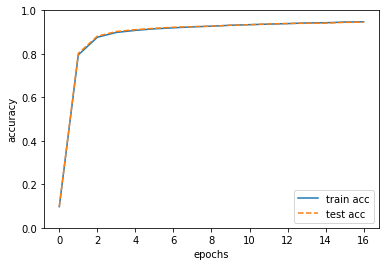

In [9]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

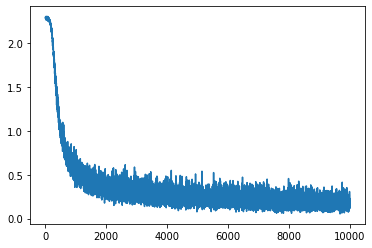

In [10]:
plt.plot(train_loss_list)

In [13]:
x=np.array([1,2])
x.size

2

In [16]:
for i in range(x.size):
    print(i)

0
1
